In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving House_Price.csv to House_Price (22).csv


In [ ]:
df_house = pd.read_csv('House_Price.csv')

df_house.head()


print(df_house[['bedrooms', 'price']].groupby(['bedrooms'], as_index=True).mean().sort_values(by='price', ascending=False))
print(df_house[['bathrooms', 'price']].groupby(['bathrooms'], as_index=True).mean().sort_values(by='price', ascending=False))
print(df_house[['floors', 'price']].groupby(['floors'], as_index=True).mean().sort_values(by='price', ascending=False))
print(df_house[['sqft_living', 'price']].groupby(['sqft_living'], as_index=True).mean().sort_values(by='price', ascending=False))
print(df_house[['yr_built', 'price']].groupby(['yr_built'], as_index=True).mean().sort_values(by='price', ascending=False))
print(df_house[['condition', 'price']].groupby(['condition'], as_index=True).mean().sort_values(by='price', ascending=False))

print(df_house[['view', 'price']].groupby(['view'], as_index=True).mean().sort_values(by='price', ascending=False))

print(df_house[['waterfront', 'price']].groupby(['waterfront'], as_index=True).mean().sort_values(by='price', ascending=False))

                 price
bedrooms              
0.0       1.195324e+06
8.0       1.155000e+06
7.0       1.049429e+06
6.0       8.173628e+05
5.0       7.701860e+05
4.0       6.351194e+05
9.0       5.999990e+05
3.0       4.886130e+05
2.0       3.916219e+05
1.0       2.740763e+05
                  price
bathrooms              
6.75       4.668000e+06
8.00       2.280000e+06
6.50       2.238888e+06
5.50       2.028750e+06
4.75       1.934621e+06
5.25       1.463500e+06
6.25       1.444000e+06
4.25       1.396876e+06
4.50       1.379317e+06
0.00       1.195324e+06
4.00       9.590361e+05
5.00       9.461718e+05
3.25       9.442413e+05
3.50       9.030026e+05
3.75       9.013803e+05
3.00       7.055636e+05
2.75       6.434246e+05
2.50       5.727052e+05
5.75       5.400000e+05
2.25       5.371784e+05
2.00       5.268580e+05
1.25       4.611500e+05
1.75       4.595496e+05
1.50       4.110443e+05
1.00       3.326206e+05
0.75       2.939559e+05
                price
floors               
2.5     

In [ ]:
df_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
# Filtrujemy wiersze, gdzie 'bathrooms' jest równe 0
zero_bathrooms = df_house[df_house["bathrooms"] == 0]

# Wyświetlamy wyniki
print(zero_bathrooms)
#nie wazne, nie uzywam tego


                     date      price  bedrooms  bathrooms  sqft_living  \
2365  2014-06-12 00:00:00  1095000.0       0.0        0.0         3064   
3209  2014-06-24 00:00:00  1295648.0       0.0        0.0         4810   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
2365      4764     3.5           0     2          3        3064   
3209     28008     2.0           0     0          3        4810   

      sqft_basement  yr_built  yr_renovated            street     city  \
2365              0      1990          2009     814 E Howe St  Seattle   
3209              0      1990          2009  20418 NE 64th Pl  Redmond   

      statezip country  
2365  WA 98102     USA  
3209  WA 98053     USA  


In [ ]:
import pandas as pd

# dane z roku 2014
#current_year = 2014

# Obliczenie lat od budowy lub renowacji
#df_house["years_since_built_or_renovated"] = current_year - df_house[["yr_built", "yr_renovated"]].max(axis=1)

# Podgląd zmian
#print(df_house[["yr_built", "yr_renovated", "years_since_built_or_renovated"]].head())

#DODANIE TAKIEJ ZMIENNEJ NIC NIE ZMIENILO W MODELU


In [ ]:
df_house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df_house = df_house.drop(columns=["street", "country"]) #usuwam te dane bo nie sa wazne


In [ ]:
df_house["date"] = pd.to_datetime(df_house["date"])  # Konwersja na format datetime


In [ ]:
df_house["year_sold"] = df_house["date"].dt.year  # dodanie kolumny Rok sprzedaży
df_house["month_sold"] = df_house["date"].dt.month  # dodanie kolumny Miesiąc sprzedaży
df_house = df_house.drop(columns=["date"])  # Usunięcie oryginalnej kolumny daty


In [ ]:
df_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,year_sold,month_sold
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,2014,5
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,2014,5
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,2014,5
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,2014,5
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133,2014,7
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,2014,7
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059,2014,7
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178,2014,7


In [ ]:
df_house = pd.get_dummies(df_house, columns=["city", "statezip"], drop_first=True)
# One-Hot Encoding dla 'city' i 'statezip'


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Wybieramy kolumny numeryczne do skalowania
columns_to_scale = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "sqft_above", "sqft_basement",
    "yr_built", "yr_renovated",
]

# Inicjalizacja skalerów
scaler = MinMaxScaler()

# Skalowanie wybranych kolumn
df_house[columns_to_scale] = scaler.fit_transform(df_house[columns_to_scale])

# Wyświetlenie pierwszych kilku wierszy po skalowaniu
print(df_house.head())


       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0  0.333333    0.18750     0.073652  0.006775     0.2         0.0   
1  2384000.0  0.555556    0.31250     0.249051  0.007835     0.4         0.0   
2   342000.0  0.333333    0.25000     0.118451  0.010534     0.0         0.0   
3   420000.0  0.333333    0.28125     0.123766  0.006885     0.0         0.0   
4   550000.0  0.444444    0.31250     0.119210  0.009186     0.0         0.0   

   view  condition  sqft_above  ...  statezip_WA 98155  statezip_WA 98166  \
0   0.0       0.50    0.107301  ...              False              False   
1   1.0       1.00    0.331858  ...              False              False   
2   0.0       0.75    0.172566  ...              False              False   
3   0.0       0.75    0.069690  ...              False              False   
4   0.0       0.75    0.085177  ...              False              False   

   statezip_WA 98168  statezip_WA 98177  statezip_WA 981

In [ ]:
# Usunięcie wierszy, gdzie cena (price) wynosi 0 - BARDZO WAZNA RZECZ
df_house = df_house[df_house["price"] > 0]

# Sprawdzenie, czy usunięcie się powiodło
print(df_house.head())


       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0  0.333333    0.18750     0.073652  0.006775     0.2         0.0   
1  2384000.0  0.555556    0.31250     0.249051  0.007835     0.4         0.0   
2   342000.0  0.333333    0.25000     0.118451  0.010534     0.0         0.0   
3   420000.0  0.333333    0.28125     0.123766  0.006885     0.0         0.0   
4   550000.0  0.444444    0.31250     0.119210  0.009186     0.0         0.0   

   view  condition  sqft_above  ...  statezip_WA 98155  statezip_WA 98166  \
0   0.0       0.50    0.107301  ...              False              False   
1   1.0       1.00    0.331858  ...              False              False   
2   0.0       0.75    0.172566  ...              False              False   
3   0.0       0.75    0.069690  ...              False              False   
4   0.0       0.75    0.085177  ...              False              False   

   statezip_WA 98168  statezip_WA 98177  statezip_WA 981

In [ ]:
df_house.loc[:, "sqft_above":]


,sqft_above,sqft_basement,yr_built,yr_renovated,year_sold,month_sold,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,0.107301,0.000000,0.482456,0.995531,2014,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.331858,0.058091,0.184211,0.000000,2014,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.172566,0.000000,0.578947,0.000000,2014,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.069690,0.207469,0.552632,0.000000,2014,5,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0.085177,0.165975,0.666667,0.989076,2014,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.126106,0.000000,0.473684,0.982622,2014,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4596,0.120575,0.000000,0.728070,0.997517,2014,7,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4597,0.292035,0.000000,0.956140,0.000000,2014,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,0.077434,0.211618,0.649123,0.000000,2014,7,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:

y = df_house["price"]
X = df_house.drop(columns=["price"])  # Wszystkie kolumny oprócz 'price'


In [ ]:
y

,price
0,3.130000e+05
1,2.384000e+06
2,3.420000e+05
3,4.200000e+05
4,5.500000e+05
...,...
4595,3.081667e+05
4596,5.343333e+05
4597,4.169042e+05
4598,2.034000e+05


In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,...,False,False,False,False,False,False,False,False,False,False
2,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,...,False,False,False,False,False,False,False,False,False,False
4,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.333333,0.21875,0.086560,0.005330,0.0,0.0,0.0,0.75,0.126106,0.000000,...,False,False,False,False,False,False,False,False,False,False
4596,0.333333,0.31250,0.082764,0.006460,0.4,0.0,0.0,0.50,0.120575,0.000000,...,False,False,False,False,False,False,False,False,False,False
4597,0.333333,0.31250,0.200456,0.005939,0.4,0.0,0.0,0.50,0.292035,0.000000,...,False,False,False,False,False,False,False,False,False,False
4598,0.444444,0.25000,0.130600,0.005581,0.0,0.0,0.0,0.50,0.077434,0.211618,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
4134,0.444444,0.21875,0.075171,0.003914,0.2,0.0,0.0,0.75,0.109513,0.000000,...,False,False,False,False,False,False,False,False,False,False
2098,0.333333,0.28125,0.139711,0.006857,0.4,0.0,0.0,0.75,0.203540,0.000000,...,False,False,False,False,False,False,False,False,False,False
3706,0.333333,0.12500,0.063022,0.007336,0.0,0.0,0.0,0.50,0.091814,0.000000,...,False,False,False,False,False,False,False,False,False,False
4055,0.333333,0.31250,0.189066,0.040223,0.4,0.0,0.0,0.75,0.275442,0.000000,...,False,False,False,False,False,False,False,False,False,False
2153,0.333333,0.21875,0.105543,0.009447,0.0,0.0,0.0,0.50,0.153761,0.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,0.333333,0.12500,0.063022,0.008661,0.0,0.0,0.0,0.75,0.091814,0.000000,...,False,False,False,False,False,False,False,False,False,False
466,0.444444,0.25000,0.163250,0.004995,0.0,0.0,0.0,0.50,0.113938,0.232365,...,False,False,False,False,False,False,False,False,False,False
3092,0.333333,0.12500,0.059226,0.006992,0.0,0.0,0.0,0.75,0.068584,0.033195,...,True,False,False,False,False,False,False,False,False,False
3772,0.222222,0.12500,0.041002,0.001271,0.2,0.0,0.0,0.50,0.059735,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
471,0.444444,0.56250,0.383447,0.094350,0.0,0.0,0.0,0.50,0.389381,0.317427,...,False,False,False,False,False,False,False,False,False,False
2518,0.222222,0.12500,0.122248,0.004063,0.0,0.0,0.0,0.75,0.079646,0.184647,...,False,False,False,False,False,False,False,False,False,False
23,0.444444,0.31250,0.179195,0.010826,0.4,0.0,0.0,0.50,0.261062,0.000000,...,False,False,False,False,False,False,False,False,False,False
3922,0.333333,0.12500,0.049355,0.007426,0.0,0.0,0.0,1.00,0.071903,0.000000,...,False,False,False,False,False,False,False,False,False,False
135,0.444444,0.21875,0.146545,0.010304,0.0,0.0,0.0,0.75,0.175885,0.070539,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.444444,0.43750,0.306758,0.033125,0.4,0.0,0.0,0.50,0.446903,0.000000,...,False,False,False,False,False,False,False,False,False,False
2307,0.555556,0.31250,0.149582,0.004995,0.4,0.0,0.0,0.75,0.217920,0.000000,...,False,False,False,False,False,False,False,False,False,False
408,0.222222,0.12500,0.111617,0.002480,0.2,0.0,0.0,0.75,0.084071,0.147303,...,False,False,False,False,False,False,False,False,False,False
170,0.666667,0.37500,0.235383,0.108957,0.2,0.0,0.0,0.50,0.342920,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

121440.87198004503

In [ ]:
r2 = r2_score(y_test, y_pred)

r2

#wartosc pokazuje ze model jest bardzo slabo dopasowany

0.6909724650754481

In [ ]:
r2_score1=cross_val_score(model, X, y, cv=5, scoring='r2')
r2_score1.mean()

np.float64(0.617914370288368)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(214415.82755093652)

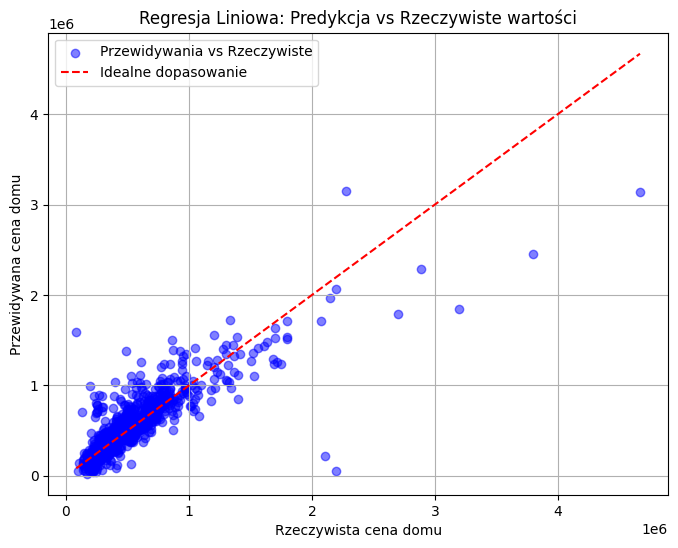

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Przewidywania vs Rzeczywiste")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Idealne dopasowanie")
plt.xlabel("Rzeczywista cena domu")
plt.ylabel("Przewidywana cena domu")
plt.title("Regresja Liniowa: Predykcja vs Rzeczywiste wartości")
plt.legend()
plt.grid(True)
plt.show()
#wykres pokazuje ze duzy blad modelu wynika ze zbyt duzego rozrzutu danych, dwa domy sa skrajnie daleko od linii predykcji

In [ ]:
print(df_house[df_house["price"] > 10000000])  # wyswietlamy domy droższe niż 10 mln, jak probowalam usunac domy powyzej 3 milionow to wychodzil gorszy wynik w modelu wiec usuwam tylko powyzej 10


           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4346  12899000.0  0.333333     0.3125     0.138193  0.010019     0.0   
4350  26590000.0  0.333333     0.2500     0.061503  0.006665     0.0   

      waterfront  view  condition  sqft_above  ...  statezip_WA 98155  \
4346         0.0   0.0       0.50    0.130531  ...              False   
4350         0.0   0.0       0.75    0.089602  ...              False   

      statezip_WA 98166  statezip_WA 98168  statezip_WA 98177  \
4346              False              False              False   
4350              False              False              False   

      statezip_WA 98178  statezip_WA 98188  statezip_WA 98198  \
4346              False              False              False   
4350              False              False              False   

      statezip_WA 98199  statezip_WA 98288  statezip_WA 98354  
4346               True              False              False  
4350              False              False 

In [ ]:
df_cleaned = df_house[df_house["price"] < 10000000]  # Usuwamy domy powyżej 10 mln, poniewaz one powoduja duza niedokladnosc modelu


In [ ]:
#df_cleaned = df_house[(df_house["bathrooms"] > 0) & (df_house["bedrooms"] > 0)] #DOMY BEZ ŁAZIENKI I SYPIALNI SA WAZNE DLA MODELU usuwanie ich zly pomysl

In [ ]:
#powtarzamy kazdy krok dla danych bez dwoch najdrozszych domow
y_cleaned = df_cleaned["price"]
X_cleaned = df_cleaned.drop(columns=["price"])


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [ ]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
y_pred1 = model1.predict(X_test1)


In [ ]:
mae1 = mean_absolute_error(y_test1, y_pred1)
mae1

112376.25153808671

In [ ]:
r2_cleaned = r2_score(y_test1, y_pred1)

r2_cleaned

0.7699199072162827

In [ ]:
r2_score2=cross_val_score(model1, X_cleaned, y_cleaned, cv=5, scoring='r2')
r2_score2.mean()   #jest lepiej z tymi usunietymi domami NAJLEPSZY MOJ MODEL

np.float64(0.7501361747736656)

In [ ]:
rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
rmse1

np.float64(192714.8059910047)

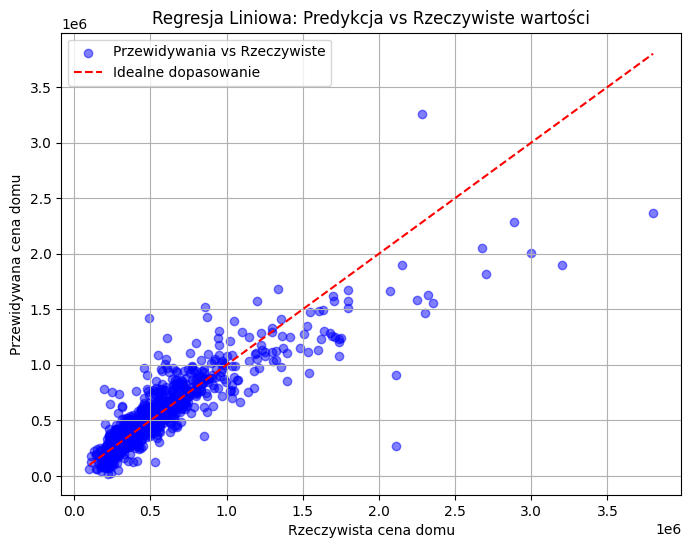

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test1, y_pred1, alpha=0.5, color="blue", label="Przewidywania vs Rzeczywiste")
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], color="red", linestyle="--", label="Idealne dopasowanie")
plt.xlabel("Rzeczywista cena domu")
plt.ylabel("Przewidywana cena domu")
plt.title("Regresja Liniowa: Predykcja vs Rzeczywiste wartości")
plt.legend()
plt.grid(True)
plt.show()
#usuniecie outlierow powoduje ze model jest duzo dokladniejszy